
## Problem 5.1

In [123]:
%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

## A data mining routine has been applied to a transaction dataset and has classified 88 records as fraudulent (30 correctly so) and 952 as non-fraudulent (920 correctly so). Construct the confusion matrix and calculate the overall error rate.

Total records = (88+952) = 1040

Records classified as fraudulent = 88

Records classified correctly as fraudulent = 30

Records classified incorrectly as non fraudulent = (88 -30) = 58

Records classified as non fraudulent = 952

Records classified correctly as non fraudulent = 920

Records classified incorrectly as non fraudulent = (952 - 920) = 32

Overall Error Rate = (58+32) / 1040 = 0.0865 or 8.65%



In [184]:
# creating predicted and actual values
y_pred = ["58", "32"]
# Actual value
y_act = ["30", "920"]

In [185]:
# create the confusion matrix
# Predicted values

confusion_matrix = np.array([[30,58],[32,920]])

print("Confusion Matrix")
# print the matrix
print(confusion_matrix)

Confusion Matrix
[[ 30  58]
 [ 32 920]]


In [191]:
# calculate error rate
error_rate = (58+32)/(30+58+32+920)
# print error rate
print("Error rate: ", round(error_rate*100,2))

Error rate:  8.65


## Problem 5.4 (a) Interpret the meaning of the first and second bars from the left.

After building a statistical model, a decile analysis is created to test the model's ability to predict the intended outcome. Each column in the analysis chart represents a collection of records scored by the model.We can see a staircase effect that descend in order from left to right. Reading the bar from left, we can see that 10% of the records 

## Problem 5.4 (b) Explain how you might use this information in practice.

In [188]:
predicted = [1 if p >0.25 else 0 for p in df.Propensity]
classificationsSummary(y_act,y_pred,class_names=['0','1'])

NameError: name 'df' is not defined

## Chapter 9

## Problem 9.1 A

In [124]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [125]:
eBay_df = pd.read_csv('eBayAuctions.csv')
eBay_df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [126]:
# remove ? from column name
eBay_df.columns = [s.strip().replace('?', '') 
                 for s in eBay_df.columns]


In [127]:
eBay_df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [128]:
# create dummy variables for Category 
dummies_categories = pd.get_dummies(eBay_df['Category']).rename(columns = lambda x: 'Category_' + str(x))

In [129]:
# create dummy variables for Currency
dummies_currency = pd.get_dummies(eBay_df['currency']).rename(columns = lambda x: 'Currency_' + str(x))

In [130]:
# create dummy variables for endDay
dummies_endday = pd.get_dummies(eBay_df['endDay']).rename(columns = lambda x: 'EndDay_' + str(x))

In [131]:
# create dummy variables for Duration
dummies_duration = pd.get_dummies(eBay_df['Duration']).rename(columns = lambda x: 'Duration_' + str(x))


In [132]:
eBay_df= pd.concat([eBay_df, dummies_categories, dummies_currency,dummies_endday, dummies_duration], axis = 1)

In [133]:
# create new dataframe
eBayauc_df = eBay_df.drop(['Category','currency','endDay','Duration'], axis = 1)


In [134]:
eBayauc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sellerRating                   1972 non-null   int64  
 1   ClosePrice                     1972 non-null   float64
 2   OpenPrice                      1972 non-null   float64
 3   Competitive                    1972 non-null   int64  
 4   Category_Antique/Art/Craft     1972 non-null   uint8  
 5   Category_Automotive            1972 non-null   uint8  
 6   Category_Books                 1972 non-null   uint8  
 7   Category_Business/Industrial   1972 non-null   uint8  
 8   Category_Clothing/Accessories  1972 non-null   uint8  
 9   Category_Coins/Stamps          1972 non-null   uint8  
 10  Category_Collectibles          1972 non-null   uint8  
 11  Category_Computer              1972 non-null   uint8  
 12  Category_Electronics           1972 non-null   u

In [135]:
X = eBayauc_df.drop(columns=['Competitive'])
y = eBayauc_df['Competitive']

In [136]:
#split the data set
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [137]:
train_y.value_counts()

1    630
0    553
Name: Competitive, dtype: int64

In [138]:
valid_y.value_counts()

1    436
0    353
Name: Competitive, dtype: int64

In [139]:
#fit the tree on training data
nClassTree = DecisionTreeClassifier()
nClassTree.fit(train_X, train_y)


DecisionTreeClassifier()

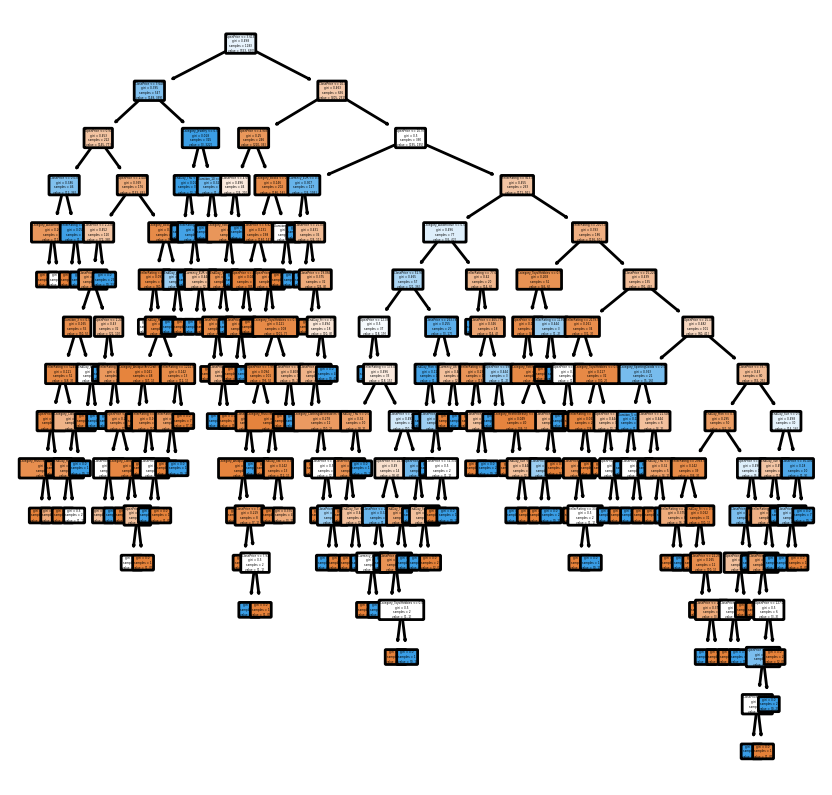

In [140]:
#plotDecisionTree
 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)
 
tree.plot_tree(nClassTree,
           feature_names = train_X.columns,
           filled = True,rounded=True);
plt.show()

In [142]:
# Confusion Matrix
classificationSummary(train_y, nClassTree.predict(train_X))
classificationSummary(valid_y, nClassTree.predict(valid_X))


Confusion Matrix (Accuracy 0.9932)

       Prediction
Actual   0   1
     0 553   0
     1   8 622
Confusion Matrix (Accuracy 0.8758)

       Prediction
Actual   0   1
     0 315  38
     1  60 376


In [143]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': nClassTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)



,features,importance
1,ClosePrice,0.465210
2,OpenPrice,0.327643
0,sellerRating,0.061862
21,Currency_EUR,0.045159
27,EndDay_Sun,0.011558
25,EndDay_Mon,0.008707
29,EndDay_Tue,0.008371
4,Category_Automotive,0.008005
28,EndDay_Thu,0.007840
20,Category_Toys/Hobbies,0.007138


In [ ]:
# fit the Random Forest


In [144]:
eBay_df = pd.read_csv('eBayAuctions.csv')
eBay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [145]:
# remove ? from column name
eBay_df.columns = [s.strip().replace('?', '') 
                 for s in eBay_df.columns]
eBay_df


,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [146]:
# create new dataframe
eBayauc_df = eBay_df.drop(['Category','currency','endDay','Duration'], axis = 1)


In [147]:
eBayauc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sellerRating  1972 non-null   int64  
 1   ClosePrice    1972 non-null   float64
 2   OpenPrice     1972 non-null   float64
 3   Competitive   1972 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 61.8 KB


In [148]:
Xn = eBayauc_df.drop(columns=['Competitive'])
yn = eBayauc_df['Competitive']

In [149]:
#split the data set
train_Xn, valid_Xn, train_yn, valid_yn = train_test_split(Xn, yn, test_size=0.4, random_state=1)

In [150]:
train_yn.value_counts()

1    630
0    553
Name: Competitive, dtype: int64

In [151]:
valid_yn.value_counts()

1    436
0    353
Name: Competitive, dtype: int64

In [152]:
#fit the tree on training data
fullClassTree = DecisionTreeClassifier(max_depth = 50, min_samples_split =7)
fullClassTree.fit(train_Xn, train_yn)

DecisionTreeClassifier(max_depth=50, min_samples_split=7)

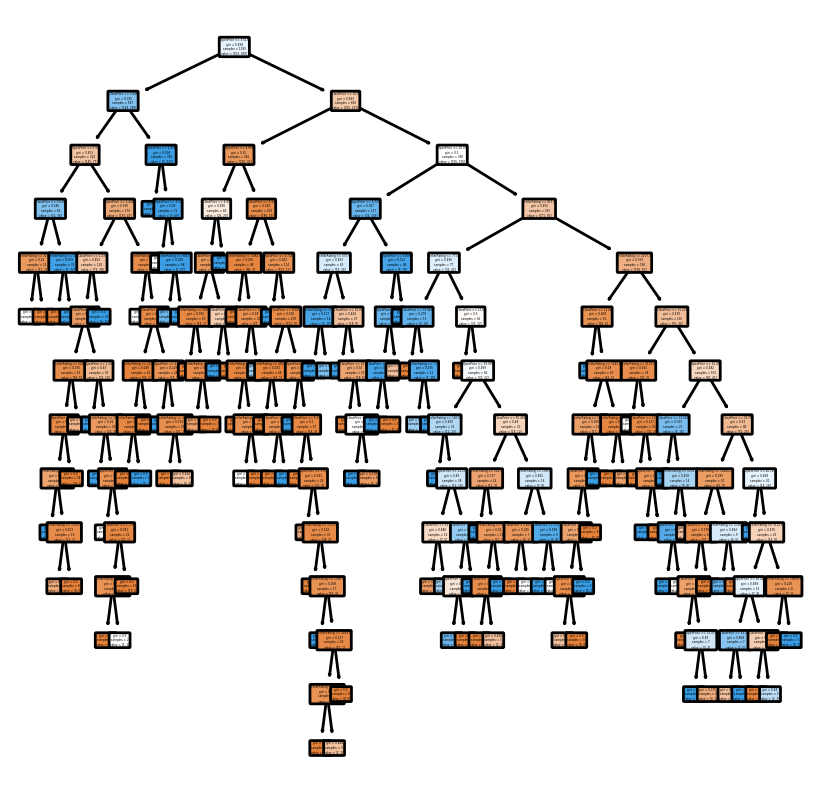

In [153]:
#plotDecisionTree
 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=200)
 
tree.plot_tree(fullClassTree,
           feature_names = train_Xn.columns,
           filled = True,rounded=True);
plt.show()

In [154]:
# Confusion Matrix
classificationSummary(train_yn, fullClassTree.predict(train_Xn))
classificationSummary(valid_yn, fullClassTree.predict(valid_Xn))

Confusion Matrix (Accuracy 0.9645)

       Prediction
Actual   0   1
     0 543  10
     1  32 598
Confusion Matrix (Accuracy 0.8783)

       Prediction
Actual   0   1
     0 319  34
     1  62 374


## Problem 9.1 D

## Problem 9.3 : Regression Trees

In [155]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn import tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from dmba import plotDecisionTree, regressionSummary, classificationSummary
import math

In [63]:
Toyota_df = pd.read_csv('ToyotaCorolla.csv')
Toyota_df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [156]:
Toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [157]:
# create dummy variables for Category 
dummy_Fuel_Type = pd.get_dummies(Toyota_df['Fuel_Type']).rename(columns = lambda x: 'Fuel_' + str(x))

In [158]:
Toyota_df= pd.concat([Toyota_df, dummy_Fuel_Type], axis = 1)

In [159]:
# create new dataframe
ToyotaCol_df = Toyota_df.drop(['Fuel_Type'], axis = 1)
ToyotaCol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   HP                 1436 non-null   int64 
 8   Met_Color          1436 non-null   int64 
 9   Color              1436 non-null   object
 10  Automatic          1436 non-null   int64 
 11  CC                 1436 non-null   int64 
 12  Doors              1436 non-null   int64 
 13  Cylinders          1436 non-null   int64 
 14  Gears              1436 non-null   int64 
 15  Quarterly_Tax      1436 non-null   int64 
 16  Weight             1436 non-null   int64 


In [160]:
# Defining predictors and outcome
predictors = ['Age_08_04', 'KM', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Petrol', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
              'Mfr_Guarantee','Guarantee_Period', 'Airco', 'Automatic_airco', 'CD_Player', 
              'Powered_Windows', 'Sport_Model', 'Tow_Bar']
outcome = 'Price'


In [161]:
Xc = ToyotaCol_df[predictors]
yc = ToyotaCol_df[outcome]

In [162]:
#split the data set
train_Xc, valid_Xc, train_yc, valid_yc = train_test_split(Xc, yc, test_size=0.4, random_state=1)

In [163]:
# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_Xc, train_yc)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [164]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_Xc, train_yc)
print('Improved parameters: ', gridSearch.best_params_)

Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [165]:
regTree = gridSearch.best_estimator_

In [166]:
regressionSummary(train_yc, regTree.predict(train_Xc))
regressionSummary(valid_yc, regTree.predict(valid_Xc))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224

Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


In [167]:
# Determine residuals and create a histogram
regTree_valid_lm = regTree.predict(valid_Xc) 
all_residuals = valid_yc - regTree_lm
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25) 
plt.tight_layout()
plt.show()

NameError: name 'regTree_lm' is not defined

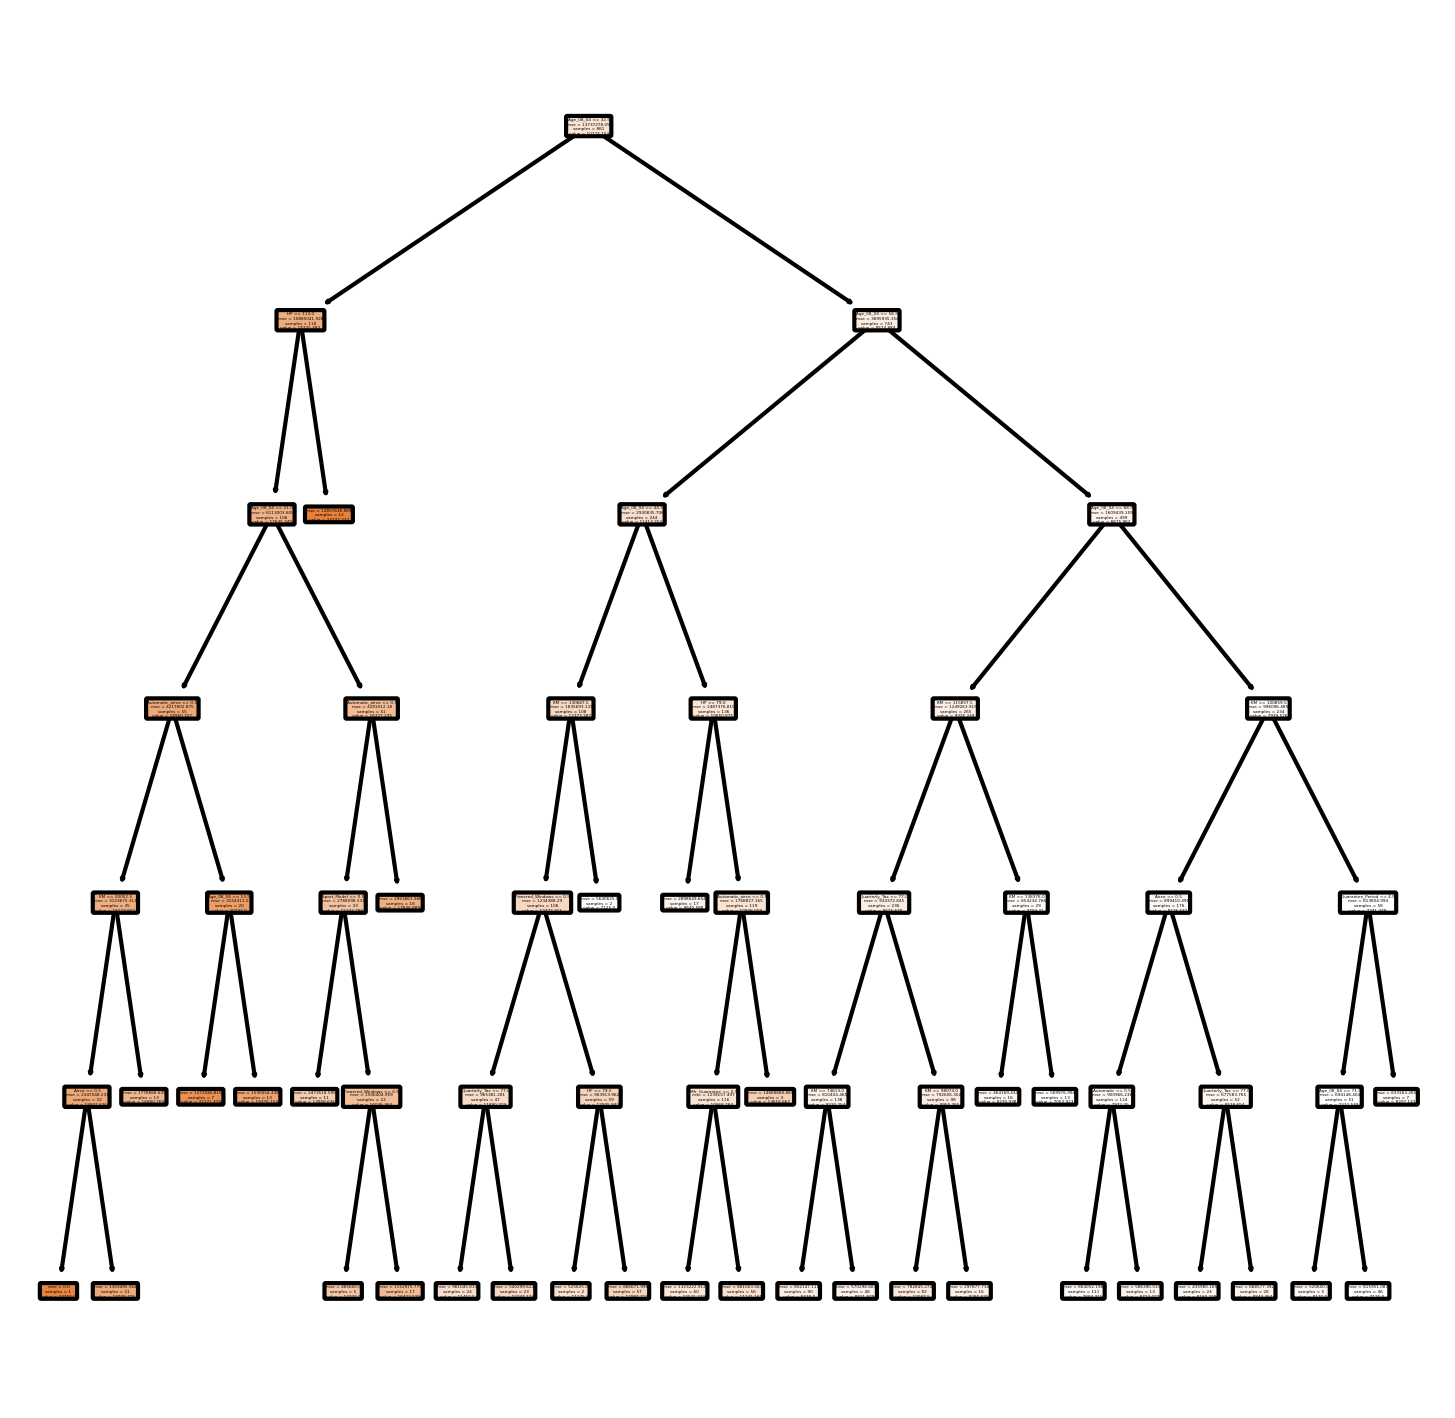

In [168]:
#plotDecisionTree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree, 
               feature_names=train_Xc.columns, 
               filled = True,rounded=True);
plt.show()

In [169]:
# Variable importance
importance = pd.DataFrame({'features': train_Xc.columns, 
                           'importance': regTree.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,features,importance
0,Age_08_04,0.894681
8,HP,0.052419
1,KM,0.021720
15,Automatic_airco,0.014292
11,Quarterly_Tax,0.004294
17,Powered_Windows,0.003680
14,Airco,0.003291
18,Sport_Model,0.002926
12,Mfr_Guarantee,0.001388
9,Automatic,0.000757


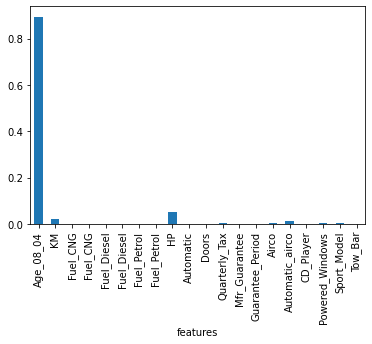

In [170]:
#Important plot
ax = importance.plot(kind ='bar', x= 'features', legend = False)
ax.set_ylabel('')
plt.show()

## Problem 9.3 (i) Which appear to be the three or four most important car specifications for predicting the car’s price?

According to the regression tree, the four most important specifications are Age_08_04, KM, HP and Automatic_airco.

In [171]:
# Regression Statistics
regressionSummary(train_yc, regTree.predict(train_Xc))
regressionSummary(valid_yc, regTree.predict(valid_Xc))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1082.6992
            Mean Absolute Error (MAE) : 786.5953
          Mean Percentage Error (MPE) : -0.9986
Mean Absolute Percentage Error (MAPE) : 7.6224

Regression statistics

                      Mean Error (ME) : 24.8976
       Root Mean Squared Error (RMSE) : 1251.3861
            Mean Absolute Error (MAE) : 958.1684
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.5594


## Problem 9.3 (ii)Compare the prediction errors of the training and validation sets by examining their RMS error and by plotting the two boxplots. How does the predictive performance of the validation set compare to the training set? Why does this occur?

## Problem 9.3 (iv)Create a smaller tree by using GridSearchCV() with cv = 5 to find a fine-tuned tree. Compared to the full-grown tree, what is the predictive performance on the validation set?

In [172]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_samples_split': [10, 20, 30, 40, 50], 
    'min_impurity_decrease': [0, 0.0001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.5941034971978346
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}


In [173]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0, 0.0009, 0.0005, 0.001, 0.0011],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.5987911741005327
Improved parameters:  {'max_depth': 8, 'min_impurity_decrease': 0, 'min_samples_split': 19}


In [177]:
regTree = gridSearch.best_estimator_

In [178]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 0.2242
     Mean Absolute Error (MAE) : 0.1005

Regression statistics

               Mean Error (ME) : 0.0278
Root Mean Squared Error (RMSE) : 0.3223
     Mean Absolute Error (MAE) : 0.1554


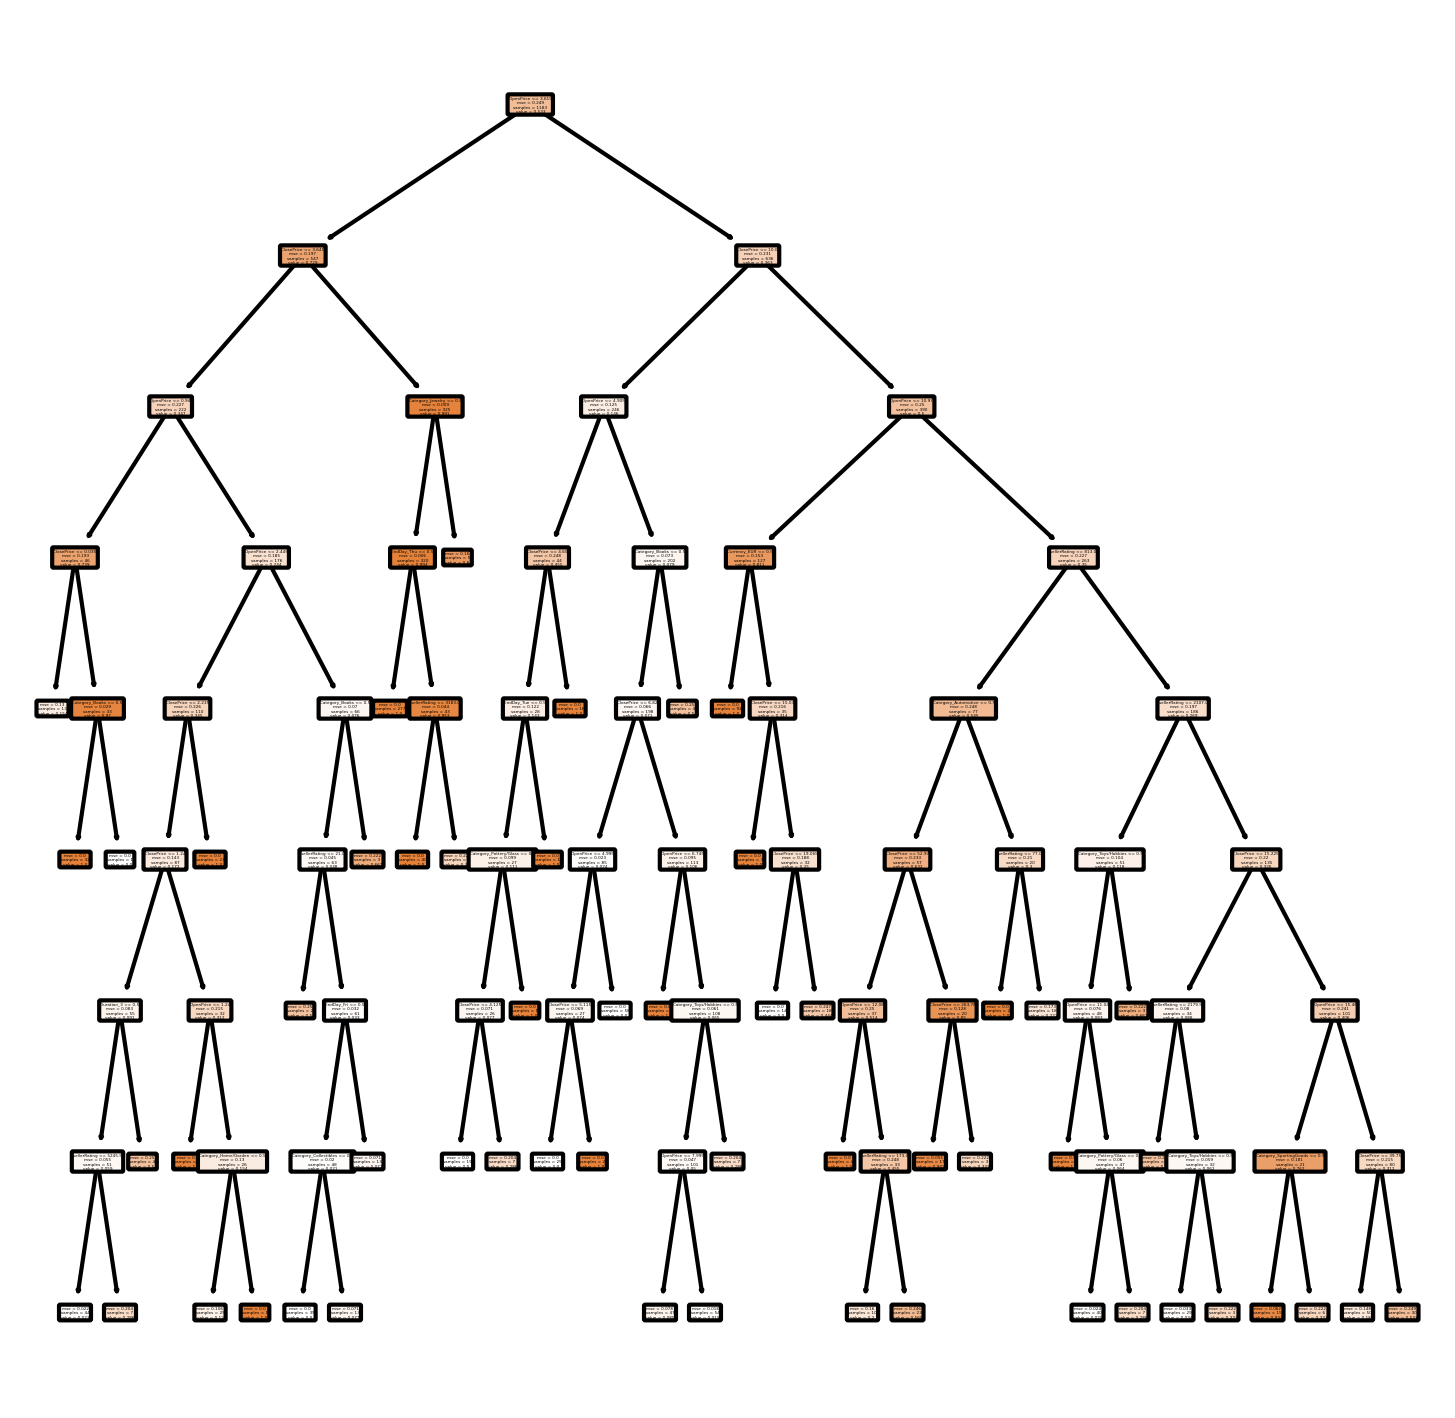

In [180]:
#plotDecisionTree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(regTree, 
               feature_names=train_X.columns, 
               filled = True,rounded=True);
plt.show()